# Reading and Understanding data

In [1]:
#Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#Reading Data
boomBikesData = pd.read_csv("day.csv")
boomBikesData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Number of rows and columns
boomBikesData.shape

#Total 730 rows and 16 columns

(730, 16)

In [4]:
boomBikesData.info()

#All the columns are non null so we don't have any missing values and except dteday - everyother variable have proper Dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Statistical summary for all numerical variables
boomBikesData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Cleaning and Standardization

In [6]:
#Dropping Casual and Registered columns as 'cnt' variable indicates the total number of bike rentals,
#including both casual and registered And The model would be built taking this 'cnt' as the target variable.

#Instant - as its is record index. 
boomBikesData.drop(['instant','casual','registered'],axis=1,inplace=True)
boomBikesData.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
#Finding weekday from the dteday value
print(datetime.datetime.strptime('January 01, 2018', '%B %d, %Y').strftime('%A'))

#Removing field from the data set after knowing the weekday.
boomBikesData.drop(['dteday'],axis=1,inplace=True)
boomBikesData.head()

Monday


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
#Mapping values from data dictionary so that we can understand categorical columns

#Season
def seasonTemp(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})
boomBikesData[['season']]= boomBikesData[['season']].apply(seasonTemp)

#Year
def yearTemp(x):
    return x.map({0:'2018',1:'2019'})
boomBikesData[['yr']]= boomBikesData[['yr']].apply(yearTemp)

#Month
def monthTemp(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boomBikesData[['mnth']]= boomBikesData[['mnth']].apply(monthTemp)

#weekday since 01-01-2018 is Monday and marked as 6 so categorizing accordingly
def weekdayTemp(x):
    return x.map({6:'Mon',0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun'})
boomBikesData[['weekday']]= boomBikesData[['weekday']].apply(weekdayTemp)

#weathersit
def weathersitTemp(x):
    return x.map({1:'Clear',2:'Cloudy',3:'Raining',4:'Snow'})
boomBikesData[['weathersit']]= boomBikesData[['weathersit']].apply(weathersitTemp)

#Printing final dataset
boomBikesData.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tue,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Univariate analysis

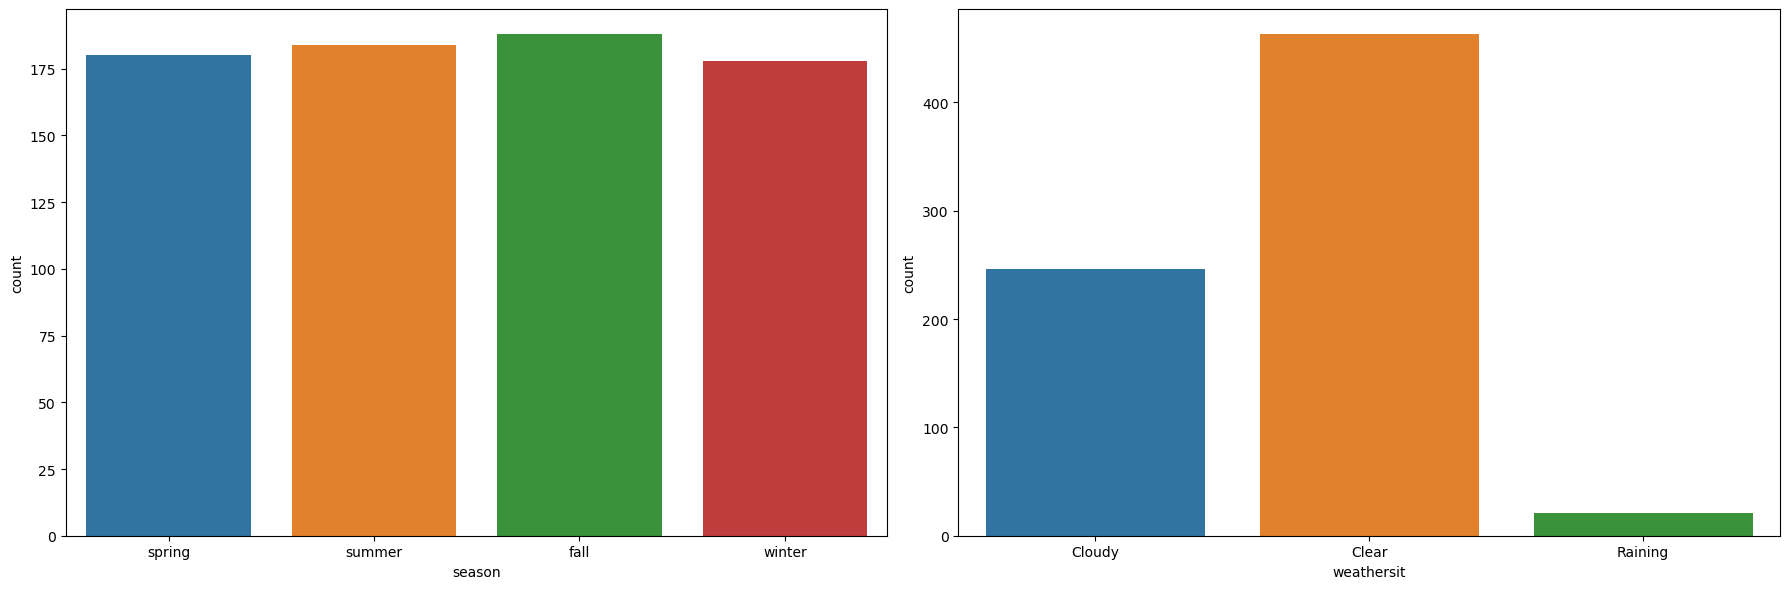

In [9]:
plt. figure(figsize=(18, 6))
for i, j in enumerate(['season','weathersit']):
    plt.subplot(1,2,i+1)
    sns.countplot(data=boomBikesData, x=j)
    plt.tight_layout()

weather situation was mostly clear in the dataset

<Axes: xlabel='yr', ylabel='count'>

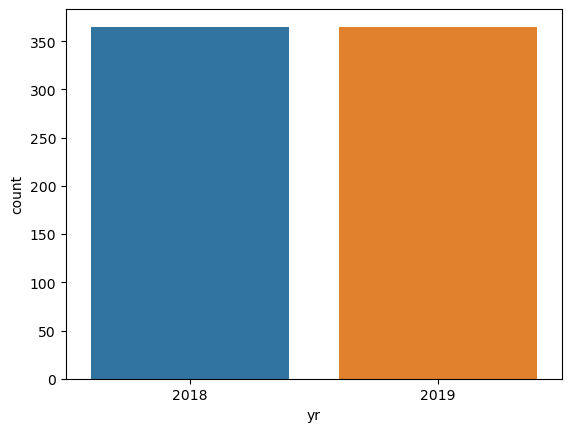

In [10]:
sns.countplot(boomBikesData, x='yr')

data is almost same for both the years

<Axes: xlabel='workingday', ylabel='count'>

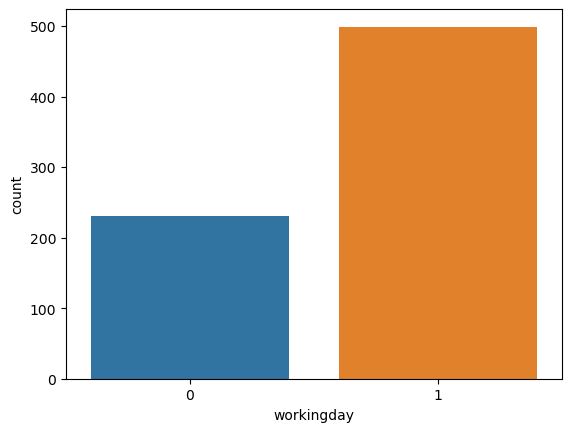

In [11]:
sns.countplot(boomBikesData, x='workingday')

More working days than weekdays

# Bivariate Analysis

## Visualising the numerical variables.

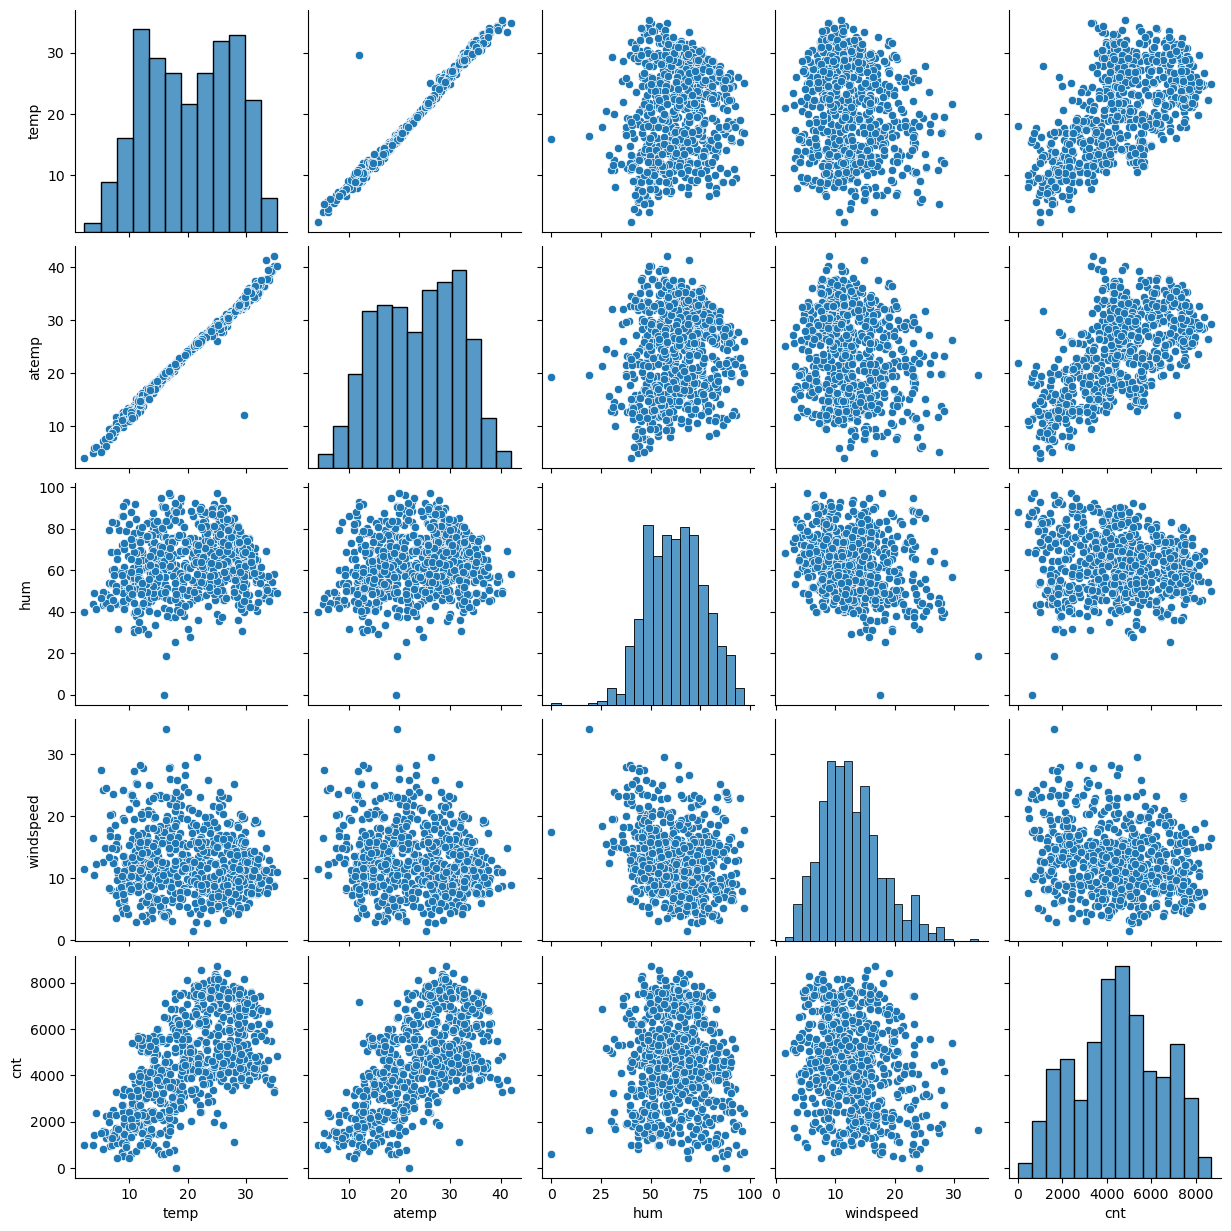

In [12]:
NumericalColumns = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(boomBikesData[NumericalColumns])
plt.show()

Inferences:
1. Bike rentals (cnt) is correlated to temp & atemp (feeling of temp basically same as before variable.). 

## Visualising the categorical variables.

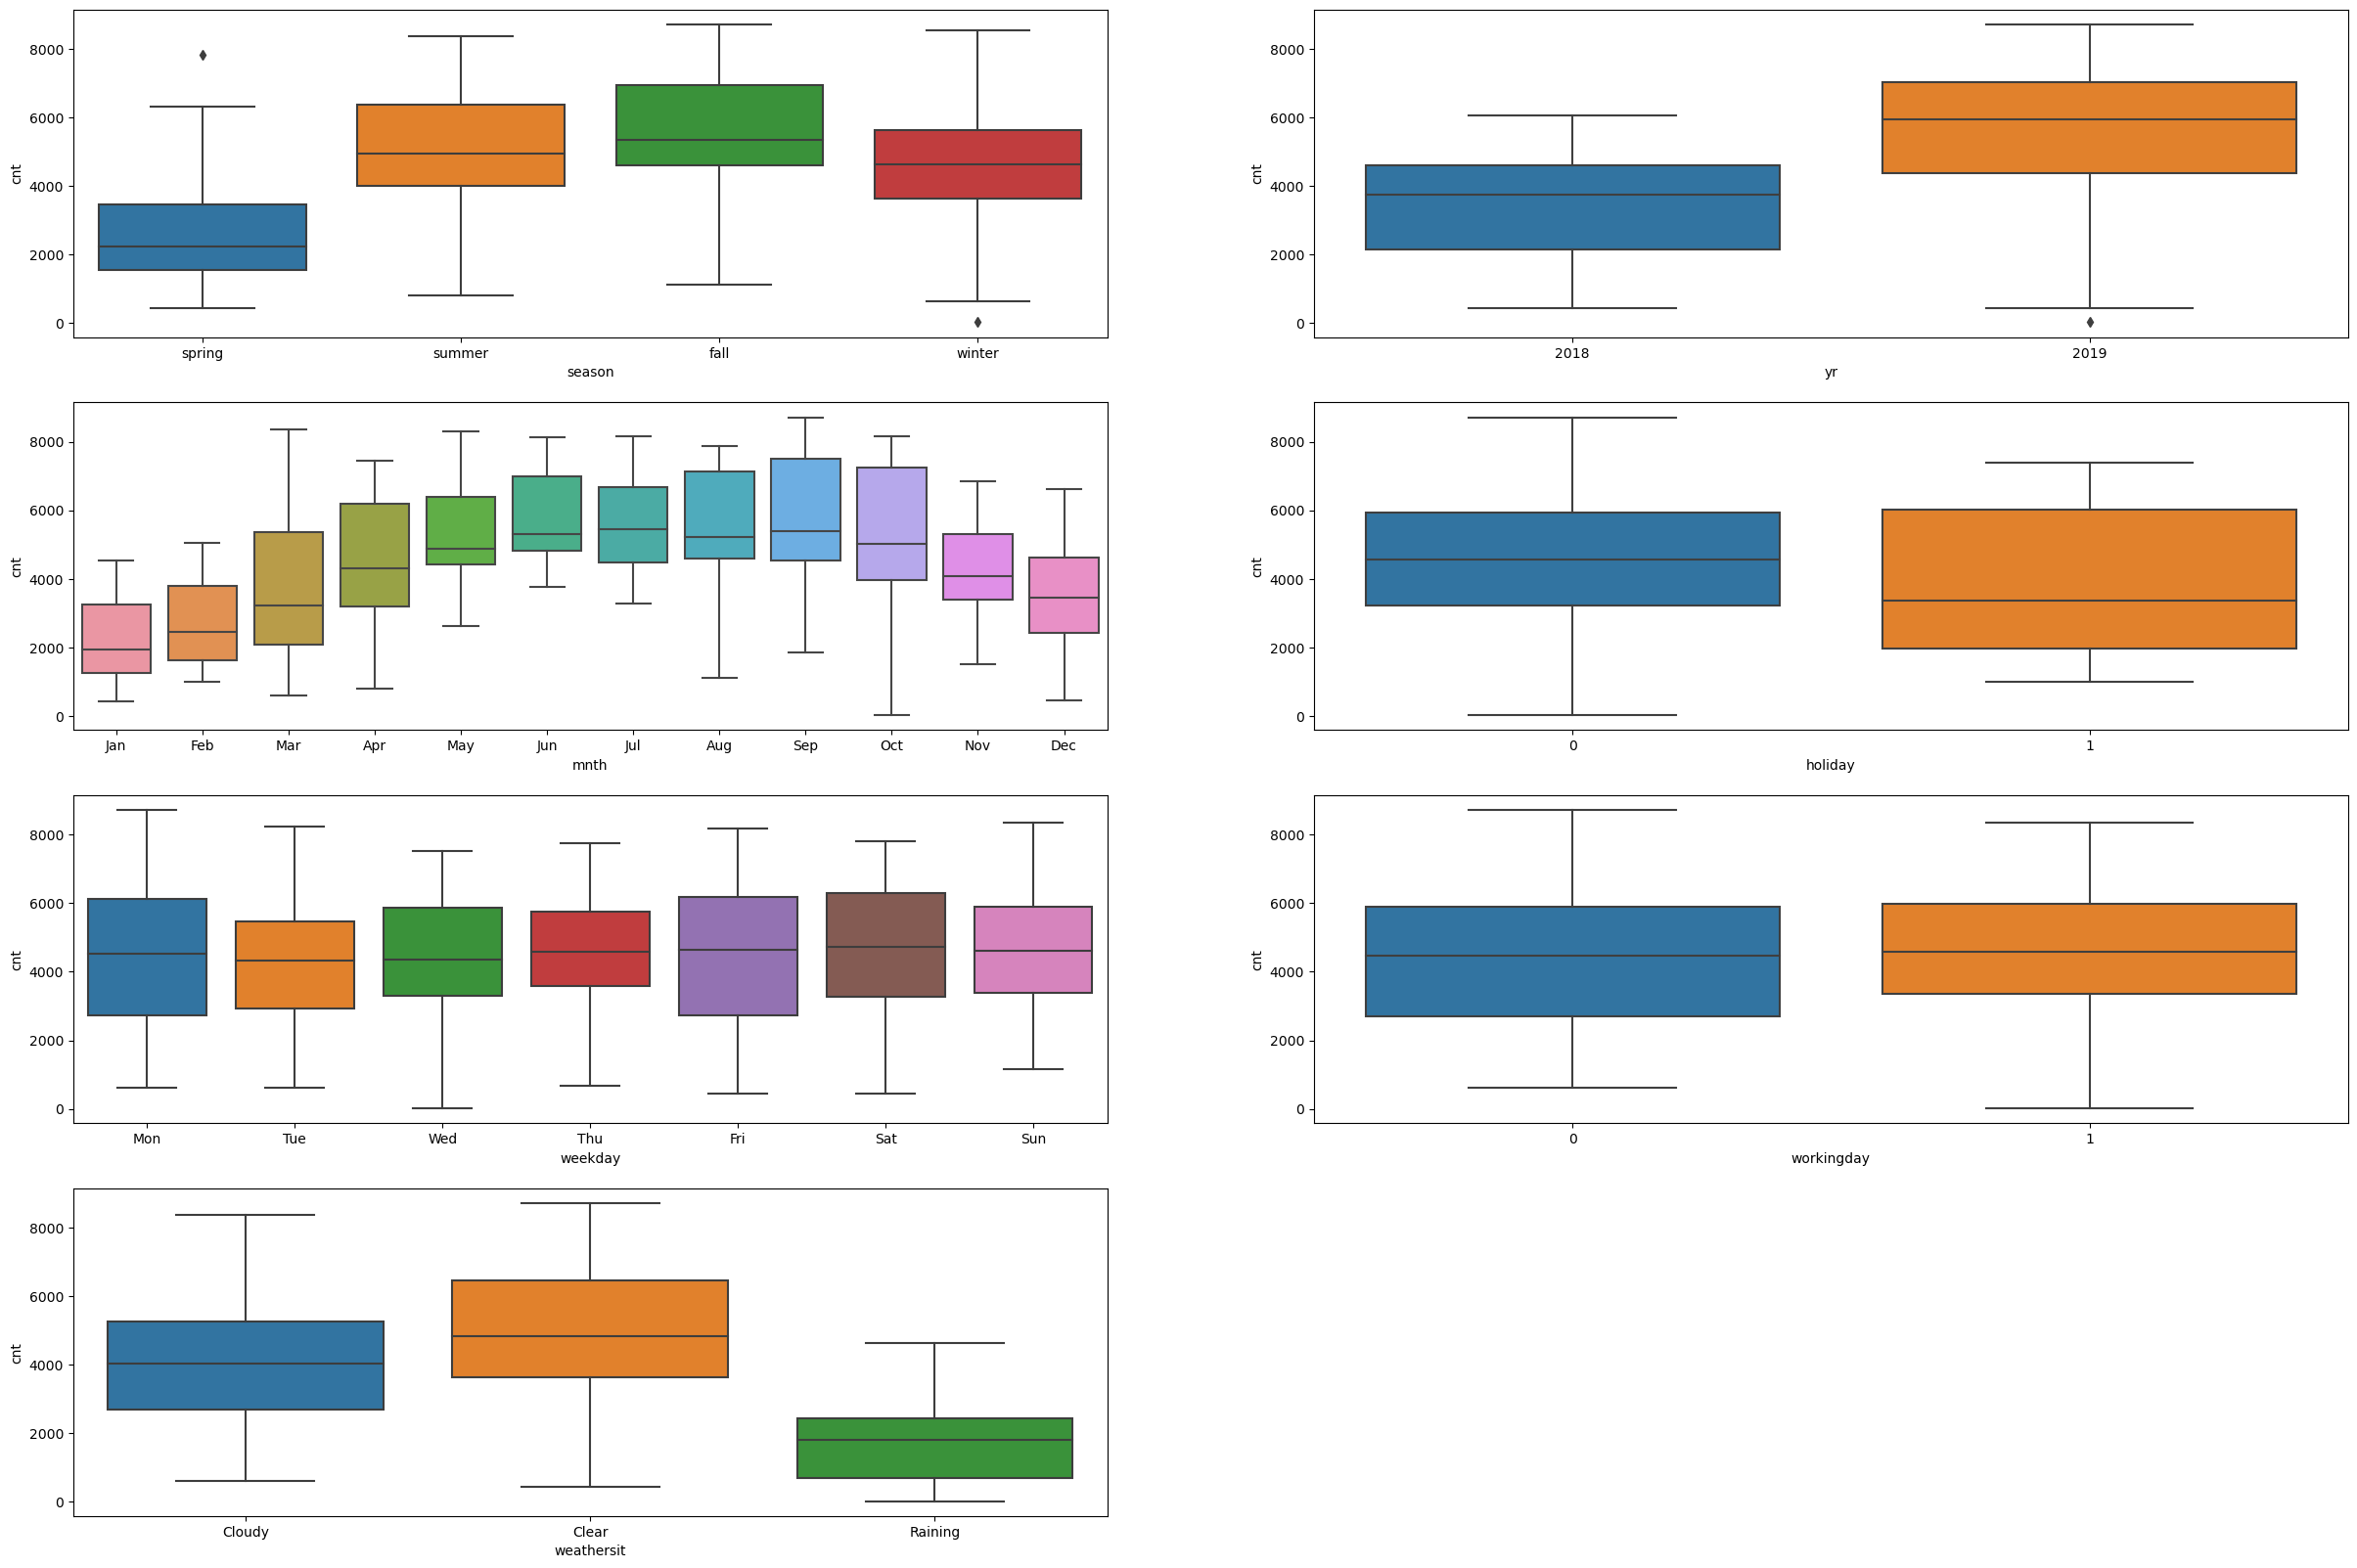

In [13]:
CategoricalColumns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(30, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = boomBikesData)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boomBikesData)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boomBikesData)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boomBikesData)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boomBikesData)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boomBikesData)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boomBikesData)
plt.show()

Inferences- 
1. We can see - on a non holiday - the count is higher compared to when holiday is there. 
2. in Year 2019 rentals count is more
3. In the mid of the year - the count increases
4. Fall season has the highest rentals

## Creating Dummy Variables

### Creating dummy variables for Season

In [14]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasonDummy'
seasonDummy = pd.get_dummies(boomBikesData['season'],dtype=int)
print(seasonDummy.value_counts())

fall  spring  summer  winter
1     0       0       0         188
0     0       1       0         184
      1       0       0         180
      0       0       1         178
Name: count, dtype: int64


In [15]:
#since dummies should be n-1 i.e for 4 value counts - dummies should only be 3. so dropping fall. 
seasonDummy = pd.get_dummies(boomBikesData['season'], drop_first = True, dtype=int)
print(seasonDummy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   spring  730 non-null    int32
 1   summer  730 non-null    int32
 2   winter  730 non-null    int32
dtypes: int32(3)
memory usage: 8.7 KB
None


In [16]:
# Add the results to the original boombikes dataframe
boomBikesData = pd.concat([boomBikesData, seasonDummy], axis = 1)

# Drop 'season' as we have created the dummies for it
boomBikesData.drop(['season'], axis = 1, inplace = True)

boomBikesData.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,2018,Jan,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2018,Jan,0,Tue,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


### Creating dummy variables for month

In [17]:
# Get the dummy variables for the feature 'month' and store it in a new variable - 'monthDummy'
monthDummy = pd.get_dummies(boomBikesData['mnth'],dtype=int)
print(monthDummy.value_counts())

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    0    0    0    0    0    1    0      62
                                        1    0    0    0      62
                                   1    0    0    0    0      62
                         1    0    0    0    0    0    0      62
                    1    0    0    0    0    0    0    0      62
          1    0    0    0    0    0    0    0    0    0      62
     1    0    0    0    0    0    0    0    0    0    0      62
     0    0    0    0    0    0    0    0    0    0    1      60
                                             1    0    0      60
                              1    0    0    0    0    0      60
1    0    0    0    0    0    0    0    0    0    0    0      60
0    0    0    1    0    0    0    0    0    0    0    0      56
Name: count, dtype: int64


In [18]:
#since dummies should be n-1 so dropping first. 
monthDummy = pd.get_dummies(boomBikesData['mnth'], drop_first = True, dtype=int)
print(monthDummy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Aug     730 non-null    int32
 1   Dec     730 non-null    int32
 2   Feb     730 non-null    int32
 3   Jan     730 non-null    int32
 4   Jul     730 non-null    int32
 5   Jun     730 non-null    int32
 6   Mar     730 non-null    int32
 7   May     730 non-null    int32
 8   Nov     730 non-null    int32
 9   Oct     730 non-null    int32
 10  Sep     730 non-null    int32
dtypes: int32(11)
memory usage: 31.5 KB
None


In [19]:
# Add the results to the original boombikes dataframe
boomBikesData = pd.concat([boomBikesData, monthDummy], axis = 1)

# Drop 'mnth' as we have created the dummies for it
boomBikesData.drop(['mnth'], axis = 1, inplace = True)

boomBikesData.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2018,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,2018,0,Tue,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,2018,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,2018,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


### Creating dummy variables for Weekday

In [20]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekdayDummy'
weekdayDummy = pd.get_dummies(boomBikesData['weekday'],dtype=int)
print(weekdayDummy.value_counts())

Fri  Mon  Sat  Sun  Thu  Tue  Wed
0    0    0    0    0    0    1      105
                         1    0      105
     1    0    0    0    0    0      105
     0    0    0    1    0    0      104
               1    0    0    0      104
          1    0    0    0    0      104
1    0    0    0    0    0    0      103
Name: count, dtype: int64


In [21]:
#since dummies should be n-1 so dropping first. 
weekdayDummy = pd.get_dummies(boomBikesData['weekday'], drop_first = True, dtype=int)
print(weekdayDummy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Mon     730 non-null    int32
 1   Sat     730 non-null    int32
 2   Sun     730 non-null    int32
 3   Thu     730 non-null    int32
 4   Tue     730 non-null    int32
 5   Wed     730 non-null    int32
dtypes: int32(6)
memory usage: 17.2 KB
None


In [22]:
# Add the results to the original boombikes dataframe
boomBikesData = pd.concat([boomBikesData, weekdayDummy], axis = 1)

# Drop 'weekday' as we have created the dummies for it
boomBikesData.drop(['weekday'], axis = 1, inplace = True)
print(boomBikesData.head)

<bound method NDFrame.head of        yr  holiday  workingday weathersit       temp     atemp      hum  \
0    2018        0           0     Cloudy  14.110847  18.18125  80.5833   
1    2018        0           0     Cloudy  14.902598  17.68695  69.6087   
2    2018        0           1      Clear   8.050924   9.47025  43.7273   
3    2018        0           1      Clear   8.200000  10.60610  59.0435   
4    2018        0           1      Clear   9.305237  11.46350  43.6957   
..    ...      ...         ...        ...        ...       ...      ...   
725  2019        0           1     Cloudy  10.420847  11.33210  65.2917   
726  2019        0           1     Cloudy  10.386653  12.75230  59.0000   
727  2019        0           0     Cloudy  10.386653  12.12000  75.2917   
728  2019        0           0      Clear  10.489153  11.58500  48.3333   
729  2019        0           1     Cloudy   8.849153  11.17435  57.7500   

     windspeed   cnt  spring  ...  May  Nov  Oct  Sep  Mon  Sat  Sun 

### Creating dummy variables for weather situation

In [23]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersitDummy'
weathersitDummy = pd.get_dummies(boomBikesData['weathersit'],dtype=int)
print(weathersitDummy.value_counts())

Clear  Cloudy  Raining
1      0       0          463
0      1       0          246
       0       1           21
Name: count, dtype: int64


In [24]:
#since dummies should be n-1 so dropping first. 
weathersitDummy = pd.get_dummies(boomBikesData['weathersit'], drop_first = True, dtype=int)
print(weathersitDummy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cloudy   730 non-null    int32
 1   Raining  730 non-null    int32
dtypes: int32(2)
memory usage: 5.8 KB
None


In [25]:
# Add the results to the original boombikes dataframe
boomBikesData = pd.concat([boomBikesData, weathersitDummy], axis = 1)

# Drop 'weathersit' as we have created the dummies for it
boomBikesData.drop(['weathersit'], axis = 1, inplace = True)
print(boomBikesData.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Cloudy', 'Raining'],
      dtype='object')


### Converting year back to 0 & 1

In [26]:
#Year
def yearTemp(x):
    return x.map({'2018':0,'2019':1})
boomBikesData[['yr']]= boomBikesData[['yr']].apply(yearTemp)

## Final Dataset

In [27]:
boomBikesData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Raining
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


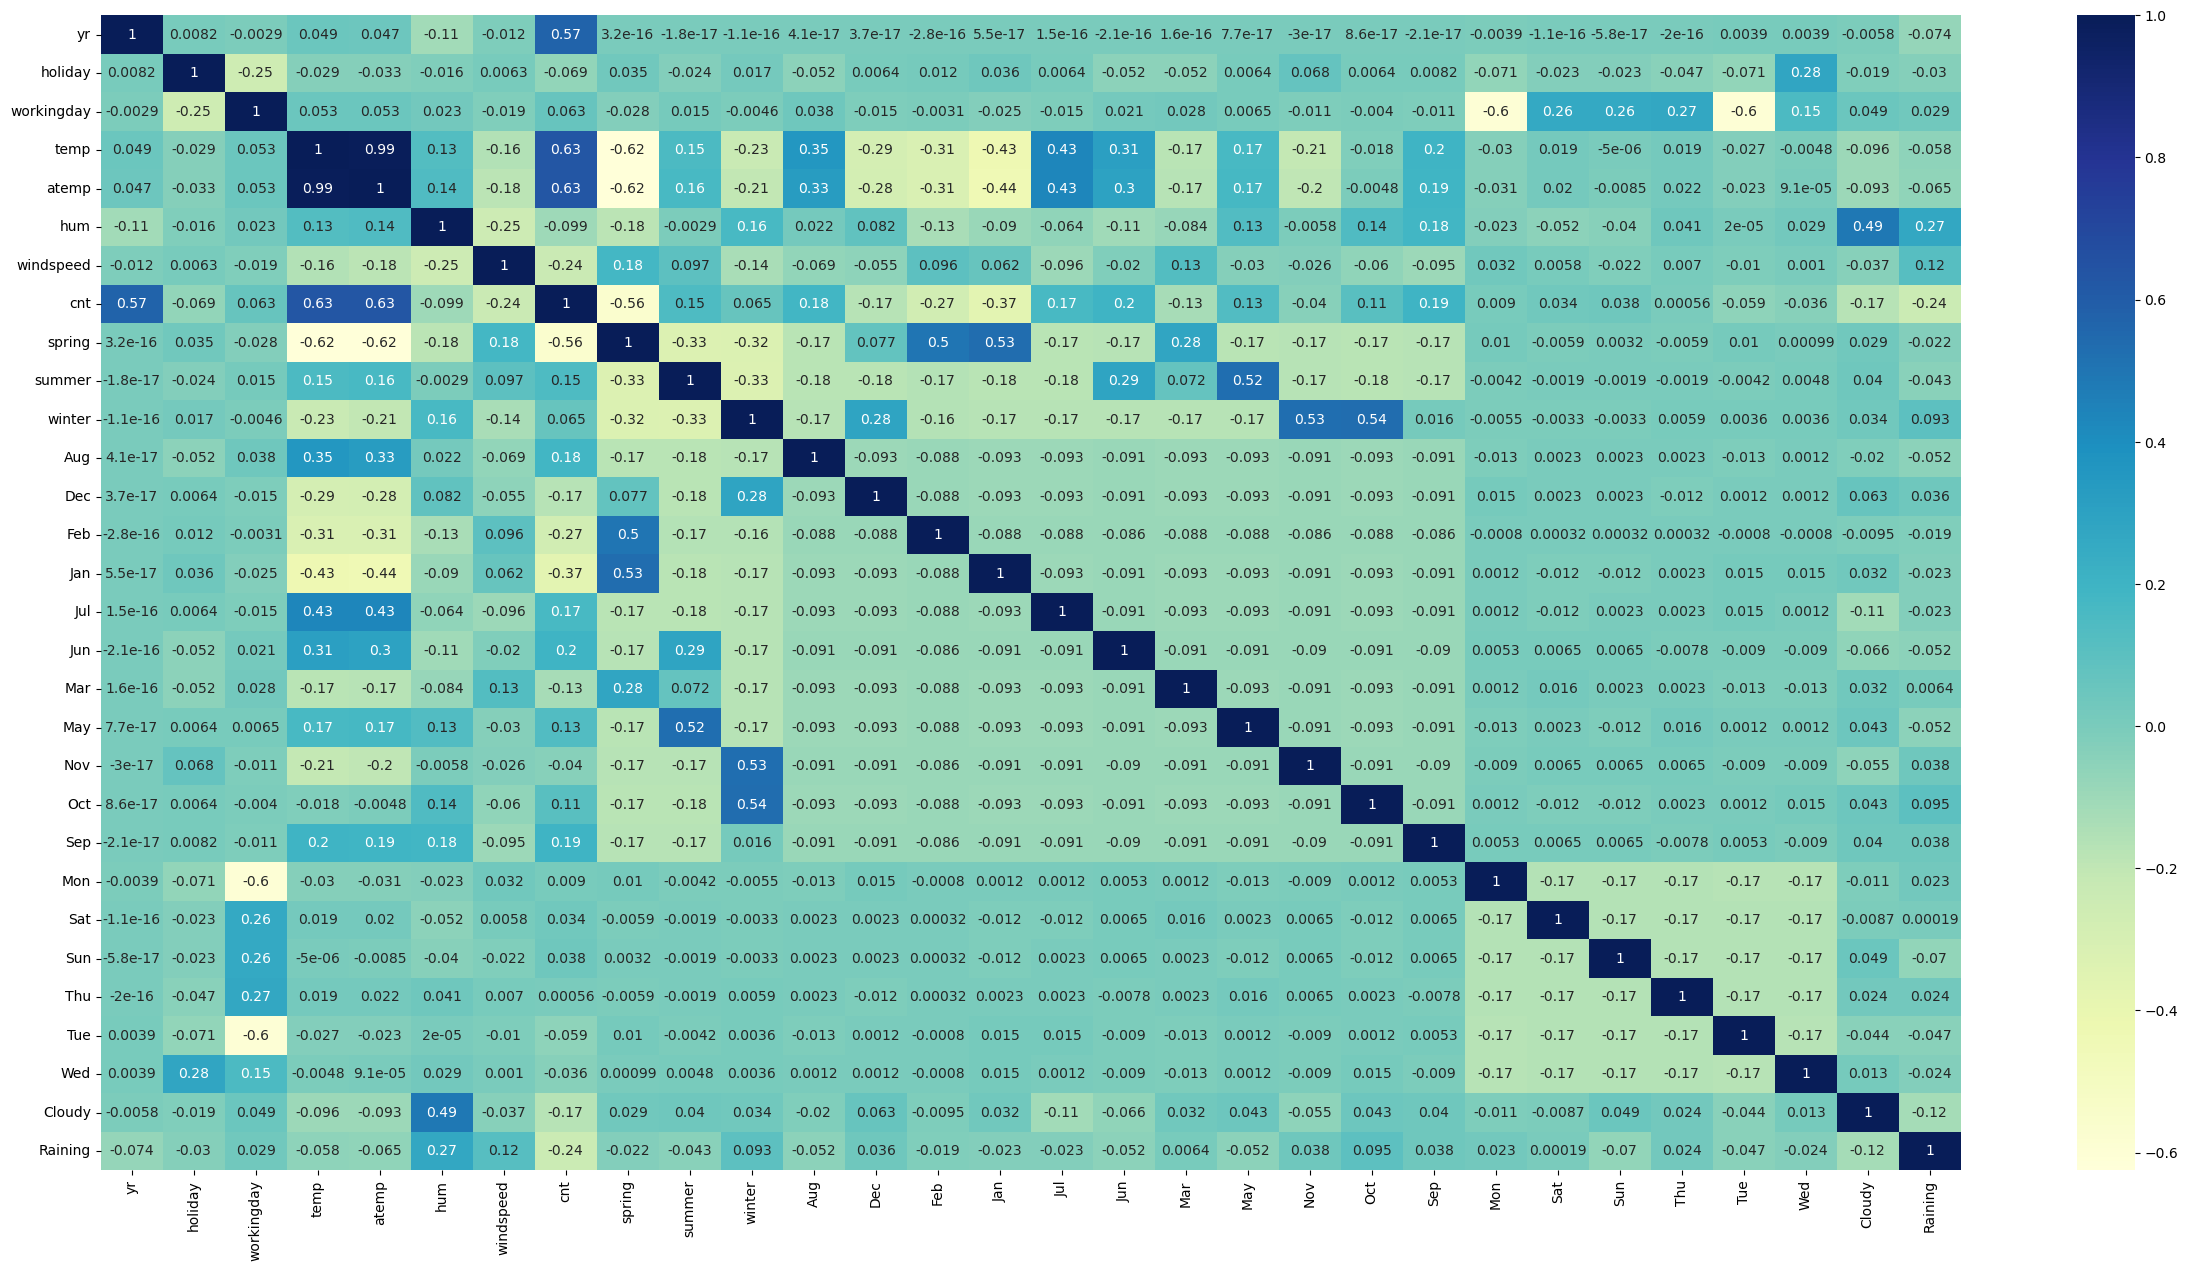

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(boomBikesData.corr(), annot = True, cmap="YlGnBu")
plt.show()

Inference:

1. Temp and ATemp are highly correlated - could be chances of multicollinearity
2. Cnt has positive correlation with temp and year
3. cnt has negative correlation in summer season. 

In [29]:
#Dropping atemp to avaoid multicollinearity from both train and test
boomBikesData.drop(['atemp'], axis = 1, inplace = True)
print("boombikesdata columns ",boomBikesData.columns)

boombikesdata columns  Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed', 'Cloudy', 'Raining'],
      dtype='object')


# Splitting DataSet into Train and Test

In [30]:
#Splitting into 70:30 ratio
df_train, df_test = train_test_split(boomBikesData, train_size = 0.7, random_state = 100)
print("shape for train set ",df_train.shape)
print("shape for test set ",df_test.shape)

shape for train set  (510, 29)
shape for test set  (220, 29)


In [31]:
# Rescalling the features

In [32]:
#Using min max scaling(normalization)
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
scalervars = ['temp', 'hum', 'windspeed','cnt']

df_train[scalervars] = scaler.fit_transform(df_train[scalervars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Raining
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
df_train.describe()
# verifying the values - normalization is done correctly - max value is 1

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Raining
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

# Recursive Feature Elimination

In [35]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 10),
 ('Sun', False, 11),
 ('Thu', False, 9),
 ('Tue', True, 1),
 ('Wed', False, 8),
 ('Cloudy', True, 1),
 ('Raining', True, 1)]

In [37]:
#Taking columns where rfe.support_ is true
rfecol = X_train.columns[rfe.support_]
rfecol

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'Mon', 'Tue', 'Cloudy', 'Raining'],
      dtype='object')

# Training the model

In [38]:
#Build a linear model with all rfe selected variables
X_train_rfe = X_train[rfecol]
X_train_lm = sm.add_constant(X_train_rfe)

#create a model & fit
lr_model = sm.OLS(y_train, X_train_lm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        14:40:18   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.000       0.145       0.254
yr             0.2298      0.008     28.647      0.000       0.214       0.246
holiday       -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday     0.0837      0.010      8.665      0.000       0.065       0.103
temp           0.5277      0.033     15.884      0.000       0.462       0.593
hum           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
Jul           -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep            0.0820      0.017      4.966      0.000       0.050       0.114
Mon            0.0937      0.012      8.040      0.000       0.071       0.117
Tue            0.0406      0.012      3.315      0.001       0.017       0.065
Cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
Raining       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     9.96e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Computing VIF

In [39]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.68
11,Mon,12.20
12,Tue,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,hum,1.91
13,Cloudy,1.57


**VIF Analysis**- 
VIF > 10, then we should definitely eliminate the variable.
VIF > 5, We need to inspect the variable before eliminating it.
VIF < 5, is definitely a good variable and we should not eliminate it.

P < 0.05 - good one

We would need to drop and analyze variables from 3 params
1. High VIF, High P - definetly need to be dropped
2. Low VIF, High p - first remove this and recalculate vif
3. High VIF, Low p - 
4. Low VIF, Low P - keep it 

### Dropping the holiday variable and updating the model

In [40]:
#Removing Holiday as it has high p value - 0.386
#Build a linear model with after removing holiday variables
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)
X_train_lm = sm.add_constant(X_train_rfe)

# #create a model & fit
lr_model = sm.OLS(y_train, X_train_lm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.11e-191
Time:                        14:40:21   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.042      4.301      0.000       0.098       0.264
yr             0.2298      0.008     28.647      0.000       0.214       0.246
workingday     0.1021      0.025      4.024      0.000       0.052       0.152
temp           0.5277      0.033     15.884      0.000       0.462       0.593
hum           -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed     -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring        -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer         0.0537      0.015      3.631      0.000       0.025       0.083
winter         0.0992      0.017      5.815      0.000       0.066       0.133
Jul           -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep            0.0820      0.017      4.966      0.000       0.050       0.114
Mon            0.1121      0.027      4.181      0.000       0.059       0.165
Tue            0.0591      0.027      2.192      0.029       0.006       0.112
Cloudy        -0.0563      0.010     -5.425      0.000      -0.077      -0.036
Raining       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Check for the VIF values of the after removing holiday variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,Mon,4.91
5,spring,4.80
11,Tue,4.76
7,winter,3.69
6,summer,3.04
12,Cloudy,2.31


### Dropping the Humidity variable and updating the model

In [42]:
#Removing humidity as it has high VIF value - 32
#Build a linear model with after removing humidity variables
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)
X_train_lm = sm.add_constant(X_train_rfe)

# #create a model & fit
lr_model = sm.OLS(y_train, X_train_lm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.28e-188
Time:                        14:40:26   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      0.038      2.624      0.009       0.025       0.176
yr             0.2337      0.008     28.828      0.000       0.218       0.250
workingday     0.1029      0.026      3.983      0.000       0.052       0.154
temp           0.4915      0.033     15.027      0.000       0.427       0.556
windspeed     -0.1491      0.025     -6.024      0.000      -0.198      -0.100
spring        -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer         0.0477      0.015      3.180      0.002       0.018       0.077
winter         0.0846      0.017      4.971      0.000       0.051       0.118
Jul           -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Sep            0.0759      0.017      4.537      0.000       0.043       0.109
Mon            0.1146      0.027      4.201      0.000       0.061       0.168
Tue            0.0567      0.027      2.069      0.039       0.003       0.111
Cloudy        -0.0822      0.009     -9.514      0.000      -0.099      -0.065
Raining       -0.2895      0.024    -11.880      0.000      -0.337      -0.242
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Check for the VIF values of the after removing humidity variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,Mon,4.45
10,Tue,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
0,yr,2.07
7,Jul,1.60


### Dropping the working day variable and updating the model

In [44]:
#Removing workingday as it has high VIF value - 16
#Build a linear model with after removing workingday variables
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)
X_train_lm = sm.add_constant(X_train_rfe)

# #create a model & fit
lr_model = sm.OLS(y_train, X_train_lm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.06e-186
Time:                        14:40:28   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.030      6.760      0.000       0.142       0.259
yr             0.2342      0.008     28.467      0.000       0.218       0.250
temp           0.4928      0.033     14.847      0.000       0.428       0.558
windspeed     -0.1513      0.025     -6.025      0.000      -0.201      -0.102
spring        -0.0681      0.021     -3.225      0.001      -0.110      -0.027
summer         0.0481      0.015      3.159      0.002       0.018       0.078
winter         0.0816      0.017      4.731      0.000       0.048       0.116
Jul           -0.0488      0.019     -2.618      0.009      -0.085      -0.012
Sep            0.0723      0.017      4.264      0.000       0.039       0.106
Mon            0.0157      0.011      1.370      0.171      -0.007       0.038
Tue           -0.0421      0.012     -3.548      0.000      -0.065      -0.019
Cloudy        -0.0802      0.009     -9.170      0.000      -0.097      -0.063
Raining       -0.2848      0.025    -11.530      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       80.355   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.836
Skew:                          -0.790   Prob(JB):                     7.39e-46
Kurtosis:                       5.699   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Check for the VIF values of the after removing workingday variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,summer,2.24
3,spring,2.11
0,yr,2.07
5,winter,1.82
6,Jul,1.59
10,Cloudy,1.55
7,Sep,1.33
8,Mon,1.22


### Dropping the Mon variable and updating the model

In [46]:
#Removing Mon as it has high P value - 0.171 > 0.05
#Build a linear model with after removing Mon variables
X_train_rfe = X_train_rfe.drop(['Mon'], axis = 1)
X_train_lm = sm.add_constant(X_train_rfe)

# #create a model & fit
lr_model = sm.OLS(y_train, X_train_lm).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.37e-187
Time:                        14:40:30   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2034      0.030      6.877      0.000       0.145       0.261
yr             0.2339      0.008     28.414      0.000       0.218       0.250
temp           0.4917      0.033     14.805      0.000       0.426       0.557
windspeed     -0.1497      0.025     -5.963      0.000      -0.199      -0.100
spring        -0.0682      0.021     -3.227      0.001      -0.110      -0.027
summer         0.0479      0.015      3.145      0.002       0.018       0.078
winter         0.0818      0.017      4.739      0.000       0.048       0.116
Jul           -0.0483      0.019     -2.587      0.010      -0.085      -0.012
Sep            0.0723      0.017      4.260      0.000       0.039       0.106
Tue           -0.0450      0.012     -3.847      0.000      -0.068      -0.022
Cloudy        -0.0802      0.009     -9.161      0.000      -0.097      -0.063
Raining       -0.2847      0.025    -11.513      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Check for the VIF values of the after removing Mon variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,summer,2.23
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,Jul,1.59
9,Cloudy,1.55
7,Sep,1.33
8,Tue,1.17


We came down to 10 variables and R squared = 0.836, adjusted R sqaured = 0.832

# Residual Analysis of the train data

In [48]:
y_train_pred = lr_model.predict(X_train_lm)

Text(0.5, 0, 'Errors')

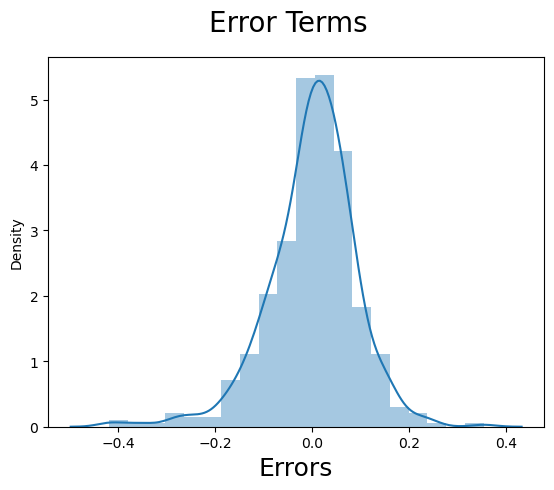

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

Error terms are normally distributed with centre on 0.0.

# Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final test model

### Applying the scaling on the test sets

In [50]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
scalervars = ['temp', 'hum', 'windspeed','cnt']

df_test[scalervars] = scaler.transform(df_test[scalervars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Raining
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Raining
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [52]:
y_test = df_test.pop('cnt')
X_test = df_test[X_train_rfe.columns]

In [53]:
# Adding constant variable to test dataframe
X_test_after_const = sm.add_constant(X_test)

# Making predictions using the model
y_pred = lr_model.predict(X_test_after_const)

# Model Evaluation

Text(0, 0.5, 'y_pred')

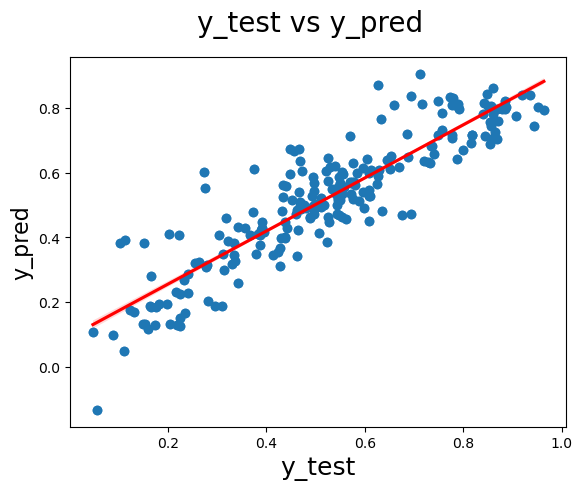

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [55]:
#R2 score of the train set
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('r2 score on the train set is', r2_train)

#R2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the train set is 0.8355513232579529
r2 score on the test set is 0.8057616301094371


The R-squared value of the train set is 83.55% whereas the test set has a value of 80.57% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

In [56]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.008266171610223671
Mean squared error of the test set is 0.009287367709021672


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

#### Equation of the best fitted line is:

In [57]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          3.37e-187
Time:                        14:40:43   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2034      0.030      6.877      0.000       0.145       0.261
yr             0.2339      0.008     28.414      0.000       0.218       0.250
temp           0.4917      0.033     14.805      0.000       0.426       0.557
windspeed     -0.1497      0.025     -5.963      0.000      -0.199      -0.100
spring        -0.0682      0.021     -3.227      0.001      -0.110      -0.027
summer         0.0479      0.015      3.145      0.002       0.018       0.078
winter         0.0818      0.017      4.739      0.000       0.048       0.116
Jul           -0.0483      0.019     -2.587      0.010      -0.085      -0.012
Sep            0.0723      0.017      4.260      0.000       0.039       0.106
Tue           -0.0450      0.012     -3.847      0.000      -0.068      -0.022
Cloudy        -0.0802      0.009     -9.161      0.000      -0.097      -0.063
Raining       -0.2847      0.025    -11.513      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

cnt = 0.2339×yr + 0.4917×temp - 0.1497×windspeed -0.0682×spring + 0.00479×summer + 0.0818×winter - 0.0483×Jul + 0.0723×Sep - 0.0450×Tue - 0.0802×Cloudy -0.2847×Raining + 0.2034

We can conclude that the bike demands for the BoomBikes company is dependent on the below variables.

1. Highly dependent on temperature. 
2. More rentals seem to be demanded on the winters as compared to the summer and spring. 
3. We had observed that the September has higher use of rentals. 
4. While when its cloudy then also people seem to rent more bikes. 